In [1]:
import tensorflow as tf

tf.random.set_seed(0)

n_input = 13
n_hidden = 10
n_output = 1  # regression

In [2]:
w1 = tf.Variable(tf.random.normal([n_input, n_hidden]))
w2 = tf.Variable(tf.random.normal([n_hidden, n_output]))

b1 = tf.Variable(tf.random.normal([n_hidden]))
b2 = tf.Variable(tf.random.normal([n_output]))

optimizer = tf.optimizers.Adam()

2022-03-05 05:27:00.367444: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 05:27:00.402860: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
def forward(x):
    hidden = x @ w1 + b1
    hidden = tf.nn.tanh(hidden)
    prediction = hidden @ w2 + b2
    return prediction


@tf.function
def step(X, y):
    with tf.GradientTape() as tape:
        prediction = forward(X)
        loss = tf.losses.mean_squared_error(y_true=y, y_pred=prediction)
        loss = tf.reduce_mean(loss)

    weights = [w1, b1, w2, b2]
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    return loss

In [4]:
from sklearn.datasets import load_boston

X, Y = load_boston(return_X_y=True)

X = X.astype('float32')
y = Y.reshape(-1, 1)

X.shape, y.shape

/home/conficker/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

((506, 13), (506, 1))

In [5]:
losses = []
for i in range(5000):
    loss = step(X, y)
    losses.append(loss.numpy())
    if i % 10 == 0:
        print("{:03d} : {:08.6f}".format(i, sum(losses[-10:]) / 10))

000 : 85.677618
010 : 852.688849
020 : 845.266931
030 : 838.601746
040 : 832.328625
050 : 826.547211
060 : 821.057452
070 : 815.202533
080 : 809.144971
090 : 803.239117
100 : 797.677087
110 : 791.857922
120 : 786.016272
130 : 780.343231
140 : 774.820538
150 : 769.191284
160 : 763.550006
170 : 757.897192
180 : 752.344940
190 : 746.510699
200 : 740.633032
210 : 734.784760
220 : 728.927655
230 : 723.292419
240 : 717.367657
250 : 711.605066
260 : 706.010822
270 : 700.606805
280 : 695.283038
290 : 690.012195
300 : 684.792114
310 : 679.620349
320 : 674.494751
330 : 669.413306
340 : 664.374335
350 : 659.376416
360 : 654.418304
370 : 649.498877
380 : 644.617188
390 : 639.772382
400 : 634.963678
410 : 630.190369
420 : 625.451801
430 : 620.747070
440 : 616.066724
450 : 611.393280
460 : 606.789893
470 : 602.219775
480 : 597.681671
490 : 593.175183
500 : 588.699921
510 : 584.255566
520 : 579.841840
530 : 575.458447
540 : 571.105035
550 : 566.781421
560 : 562.487341
570 : 558.222577
580 : 553.98685

4780 : 76.997256
4790 : 76.992471
4800 : 76.987835
4810 : 76.983345
4820 : 76.979003
4830 : 76.974793
4840 : 76.970714
4850 : 76.966759
4860 : 76.962930
4870 : 76.959222
4880 : 76.955622
4890 : 76.952132
4900 : 76.948745
4910 : 76.945459
4920 : 76.942271
4930 : 76.939172
4940 : 76.936164
4950 : 76.933238
4960 : 76.930398
4970 : 76.927637
4980 : 76.924950
4990 : 76.922331


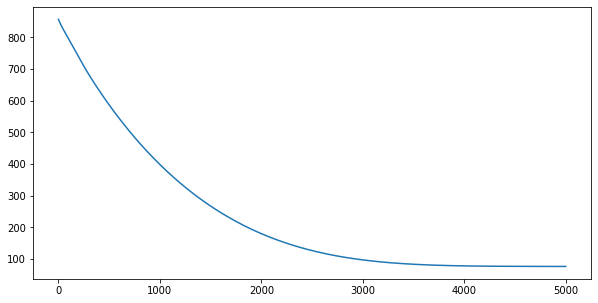

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.savefig('loss.jpg', bbox_inches='tight')